### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing datasets

In [2]:
products = pd.read_csv('product_info.csv')


### Merging reviews of 1500 products into one data file

In [3]:
files = ['reviews_0_250.csv', 'reviews_250_500.csv', 'reviews_500_750.csv', 'reviews_750_1000.csv', 'reviews_1000_1500.csv', 'reviews_1500_end.csv']

all_reviews = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    all_reviews = pd.concat([all_reviews, df])
    
all_reviews.to_csv('df_reviews', index = False)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploring all_reviews dataset

In [4]:
all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


#### T1: Dropping duplicate values

In [5]:
duplicates = all_reviews.duplicated()
values = all_reviews[duplicates]
values

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206720,206720,5113824372,4,1.0,0.851852,27,4,23,2019-05-02,I haven’t used this long enough to report any ...,NaN,mediumTan,brown,normal,black,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206721,206721,5297430713,5,1.0,0.750000,32,8,24,2019-04-27,"this serum is GREAT! Absorbs nicely, sits well...",NaN,medium,brown,dry,black,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206722,206722,2090479401,5,1.0,0.736842,38,10,28,2019-04-22,I have been using this serum on my neck (day a...,Nice Collagen Serum!,fairLight,blue,dry,blonde,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206723,206723,10575410512,4,1.0,0.795455,44,9,35,2019-04-19,I enjoyed this product more as a “primer” for ...,Great as a primer!,light,blue,combination,brown,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99


In [6]:
all_reviews.drop_duplicates(inplace = True)

In [7]:
all_reviews.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

#### T2: Replacing null values


In [8]:
all_reviews['helpfulness'] = all_reviews['helpfulness'].replace(np.nan, 0)

#### Converting data types

In [9]:
all_reviews.dtypes

Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [10]:
all_reviews['author_id'] = pd.to_numeric(all_reviews['author_id'], errors = 'coerce')

In [11]:
all_reviews['submission_time'] = pd.to_datetime(all_reviews['submission_time'])

In [12]:
all_reviews = all_reviews.dropna(subset = ['author_id'])

In [13]:
all_reviews['author_id'] = all_reviews['author_id'].astype('int')

#### T3: Replacing null values using ffill method

In [14]:
all_reviews = all_reviews.sort_values(by = ['author_id', 'skin_tone', 'eye_color', 'skin_type', 'hair_color'])


In [15]:
all_reviews['skin_tone'] = all_reviews.groupby('author_id')['skin_tone'].ffill()
all_reviews['eye_color'] = all_reviews.groupby('author_id')['eye_color'].ffill()
all_reviews['skin_type'] = all_reviews.groupby('author_id')['skin_type'].ffill()
all_reviews['hair_color'] = all_reviews.groupby('author_id')['hair_color'].ffill()

In [16]:
all_reviews.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167968
helpfulness                      0
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310641
skin_tone                   116169
eye_color                   165051
skin_type                    74698
hair_color                  168834
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

#### T4: Dropping unnecessary columns

In [17]:
all_reviews = all_reviews.drop('Unnamed: 0', axis = 1)
all_reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
12133,538863,1,0.0,0.0,0,0,0,2018-11-01,One use and into the trash this went. I woke u...,one and done,fair,blue,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
205431,540761,2,NaN,1.0,1,0,1,2009-09-29,I never really got the chance to see how well ...,Not Sure,light,NaN,combination,NaN,P481817,"Beauty Elixir Prep, Set, Glow Face Mist",Caudalie,49.0
30869,549704,5,NaN,1.0,3,0,3,2011-04-21,I like this a lot. I was a little afraid to tr...,Sweet!,lightMedium,NaN,NaN,NaN,P218700,100 percent Pure Argan Oil,Josie Maran,49.0
93193,553815,5,1.0,0.0,0,0,0,2023-02-11,Loved that the Spf is in serum form & left no ...,Great Sunscreen,lightMedium,hazel,dry,brown,P470217,Liquid Sun Shield Daily Brightening Mineral Su...,Dr. Brandt Skincare,67.0
230182,557770,5,NaN,1.0,1,0,1,2016-02-19,It is ugly and smelly - but this product works...,Sulfur Rules!,NaN,NaN,combination,NaN,P232903,EradiKate Acne Treatment,Kate Somerville,28.0


#### T5: Changing 'Grey' to 'gray' in column 'eye_color'

In [18]:
all_reviews['eye_color'] = all_reviews['eye_color'].replace('Grey', 'gray')
all_reviews['eye_color'].value_counts()

brown    493363
blue     180621
hazel    123942
green    123940
gray       7430
Name: eye_color, dtype: int64

## Exploring products dataset

In [19]:
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


#### T1: Dropping dupicates

In [20]:
duplicates = products.duplicated()
products[duplicates]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


In [21]:
products.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [22]:
products.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [23]:
null_values = products.isnull().sum()
print((null_values/len(products))*100)

product_id             0.000000
product_name           0.000000
brand_id               0.000000
brand_name             0.000000
loves_count            0.000000
rating                 3.272899
reviews                3.272899
size                  19.201789
variation_type        17.000235
variation_value       18.813280
variation_desc        85.283730
ingredients           11.125500
price_usd              0.000000
value_price_usd       94.690370
sale_price_usd        96.821286
limited_edition        0.000000
new                    0.000000
online_only            0.000000
out_of_stock           0.000000
sephora_exclusive      0.000000
highlights            25.983047
primary_category       0.000000
secondary_category     0.094184
tertiary_category     11.655286
child_count            0.000000
child_max_price       67.577113
child_min_price       67.577113
dtype: float64


#### Droppining columns 'value_price_usd', 'sale_price_usd'

In [24]:
products = products.drop(['value_price_usd', 'sale_price_usd', 'variation_desc', 'child_max_price', 'child_min_price'], axis = 1)

#### Q1: Top 5 brands with the highest sales

In [27]:
sales_products = all_reviews.groupby('brand_name')[['price_usd']].agg('sum').reset_index()
top_5 = sales_products.sort_values(by = 'price_usd', ascending = False)[0:5]
top_5

,brand_name,price_usd
120,Tatcha,2486385.0
27,Drunk Elephant,2330236.0
114,Sunday Riley,2051848.0
135,fresh,1919800.0
10,CLINIQUE,1783998.0


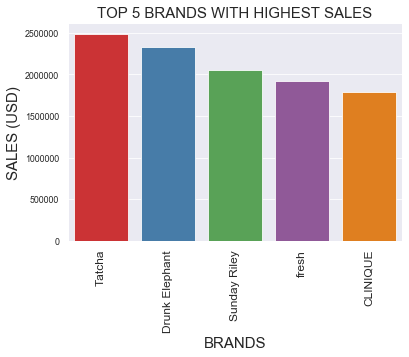

In [28]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.set_context('paper')
g = sns.barplot(data = top_5, x = 'brand_name', y = 'price_usd', hue_order = 'price_usd')
g.set_xticklabels(top_5['brand_name'], rotation = 90, size = 12)
g.set_ylabel('SALES (USD)', size = 15)
g.set_xlabel('BRANDS', size = 15)
g.set_title('TOP 5 BRANDS WITH HIGHEST SALES', size = 15)

plt.show()

#### Q2: In which year there was the highest sales?

In [30]:
all_reviews['year'] = all_reviews['submission_time'].dt.year
year_sales = all_reviews.groupby('year')[['price_usd']].agg('sum').reset_index()
year_sales['price_usd'] = year_sales['price_usd'].astype('int')
year_sales

,year,price_usd
0,2008,84937
1,2009,312263
2,2010,448767
3,2011,469030
4,2012,474109
5,2013,659941
6,2014,787657
7,2015,1023849
8,2016,1562086
9,2017,2664814


Text(0.5, 1.0, 'YEARLY SALES (2008-2019)')

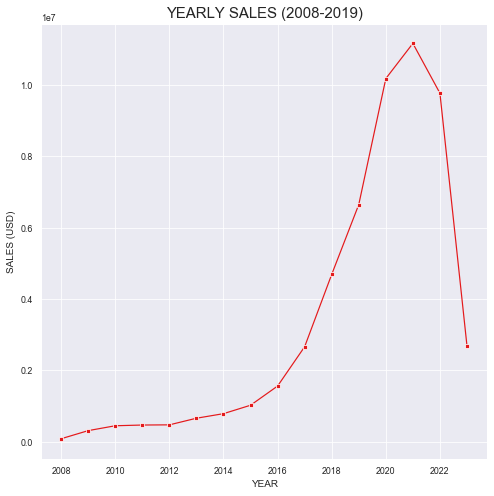

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.lineplot(x = 'year', y = 'price_usd', data = year_sales, marker = 's')
# g.set_xticklabels(range(2007, 2020), rotation = 90, size = 12)
g.set_ylabel('SALES (USD)', size = 10)
g.set_xlabel('YEAR', size = 10)
g.set_title('YEARLY SALES (2008-2019)', size = 15)

#### Q3: What are the sales and recommended proportion of the brands launching new products?

In [33]:
merged_table = all_reviews.merge(products, on = 'product_id', how = 'left')
merged_table.columns

Index(['author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x', 'year',
       'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y',
       'reviews', 'size', 'variation_type', 'variation_value', 'ingredients',
       'price_usd_y', 'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count'],
      dtype='object')

In [34]:
brand_table = merged_table[['brand_name_x','product_name_x','price_usd_x', 'is_recommended', 'new']]
new_products = brand_table[brand_table['new'] == 1]
group_products = new_products.groupby(['brand_name_x','product_name_x','price_usd_x']).agg(poistive_rev=('is_recommended','sum'), total_rev=('is_recommended','count')).reset_index()
group_products['postive_rev_perc'] = round((group_products['poistive_rev']/group_products['total_rev'])*100, 2)
group_products['sales'] = group_products['price_usd_x']*group_products['total_rev']
group_products = group_products.sort_values(['sales'], ascending  = False)[0:10]
group_products = group_products.sort_values(['brand_name_x'], ascending  = False)

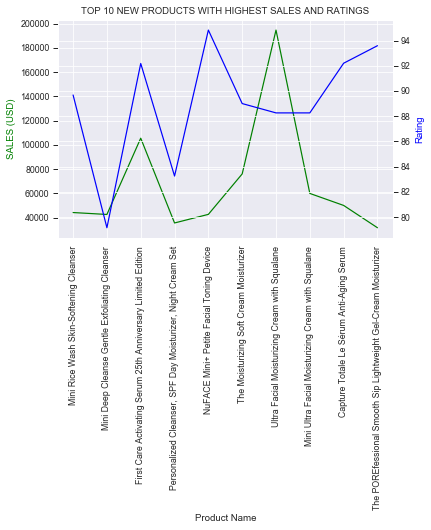

In [35]:
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(group_products['product_name_x'].values, group_products['sales'].values, color = 'g', label = group_products['sales'].values)
ax2.plot(group_products['product_name_x'].values, group_products['postive_rev_perc'].values, color = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('SALES (USD)', color = 'g')
ax2.set_ylabel('Rating', color = 'b')
ax1.set_xticklabels(group_products['product_name_x'].values, rotation = 90)
plt.title('TOP 10 NEW PRODUCTS WITH HIGHEST SALES AND RATINGS')
plt.show()
# ax2 = plt.twinx()
# g = sns.barplot(data = group_products, x = 'product_name_x', y = 'sales')
# h = sns.barplot(data = group_products, x = 'postive_rev_perc', ax = ax2)
# g.set_xticklabels(group_products['product_name_x'].values, rotation = 90, size = 12)
# g.set_ylabel('SALES (USD)', size = 15)
# g.set_xlabel('PRODUCT NAMES', size = 15)
# g.set_title('TOP 10 NEW PRODUCTS WITH HIGHEST SALES', size = 15)
# plt.show()